# MEX 1: Exploring Linear Regression and Logistic Regression

By Juan Carlos Roldan and Jeryl Salas

## First subproblem: Energy Efficiency in Buildings

In this problem, we are building a regression model to help us predict two response variables (Heating Load and Cooling Load) given a set of 8 variables (Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution).

This dataset can be retrieved from https://archive.ics.uci.edu/ml/datasets/Energy+efficiency.

In [1]:
pip install ucimlrepo pandas scikit-learn matplotlib sympy

You should consider upgrading via the '/home/mobii/.pyenv/versions/3.7.10/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pprint

pp = pprint.PrettyPrinter(indent=4)
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
# pp.pprint(energy_efficiency.metadata)
  
# variable information 
pp.pprint(energy_efficiency.variables) 


  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

In [3]:
# pp.pprint(energy_efficiency)
data = energy_efficiency['data']

X.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
y.columns = ['Heating Load', 'Cooling Load']

X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [4]:
y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [5]:
from sklearn.model_selection import train_test_split

training_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_ratio, random_state=16)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio+validation_ratio), random_state=16)

print(f'Training set: {len(X_train)} items')
print(f'Validation set: {len(X_val)} items')
print(f'Test set: {len(X_test)} items')

Training set: 460 items
Validation set: 154 items
Test set: 154 items


In [6]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


alphas = 10 ** np.linspace(10, -2, 100) * 0.5
coefs = []
mses_val = []
scores_val = []
clfs = []


for a in alphas:
    ridge_clf = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=a))])
    ridge_clf = ridge_clf.fit(X_train.values, y_train.values)
    coefs.append(ridge_clf.named_steps['ridge'].coef_)

    pred = ridge_clf.predict(X_val.values)
    mses_val.append(mean_squared_error(y_val.values, pred))
    scores_val.append(ridge_clf.score(X_val.values, y_val.values))
    clfs.append(ridge_clf)

In [7]:

# Best performing classifier on test set
values_test = list(zip(coefs, mses_val, scores_val, clfs))
values_test.sort(reverse=True, key=lambda x: x[2])
# print(values_test[0][0], values_test[0][1], values_test[0][2])
# print(values_test)
clf = values_test[0][3]

pred = clf.predict(X_test.values)
mse = mean_squared_error(y_test.values, pred)
score = clf.score(X_test.values, y_test.values)
coef = clf.named_steps['ridge'].coef_

print(coef)

[[-4.0337051  -2.0127489   1.25379393 -2.58007088  7.73214981 -0.01322202
   2.64264455  0.23054784]
 [-4.66672699 -2.09091837  0.56248121 -2.31264328  8.17268074  0.08731915
   1.95468247  0.08226244]]


Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution'],
      dtype='object')


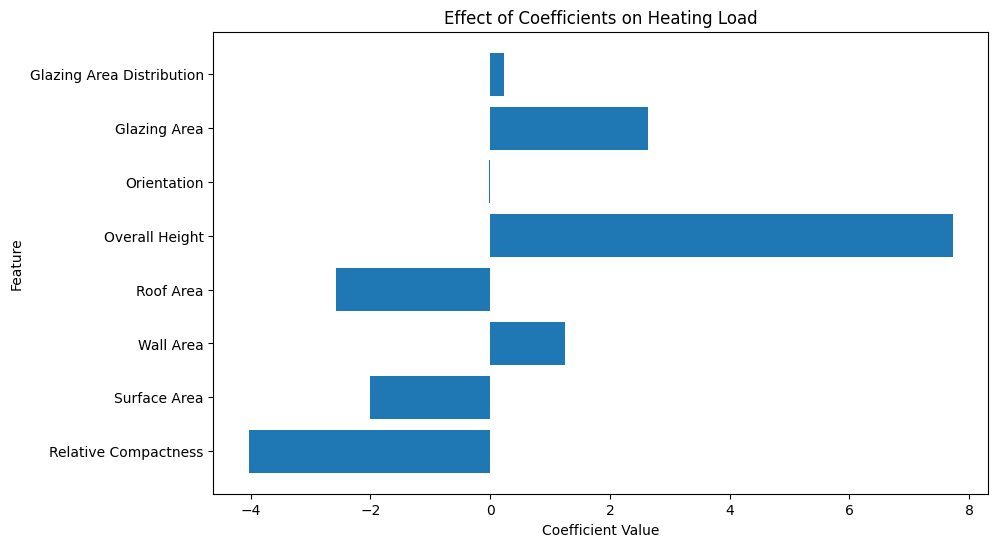

In [8]:
import matplotlib.pyplot as plt

absolute_coefficients = np.abs(coef)
feature_names = list(X.columns)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), coef[0], align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Heating Load')
print(X.columns)
plt.show()

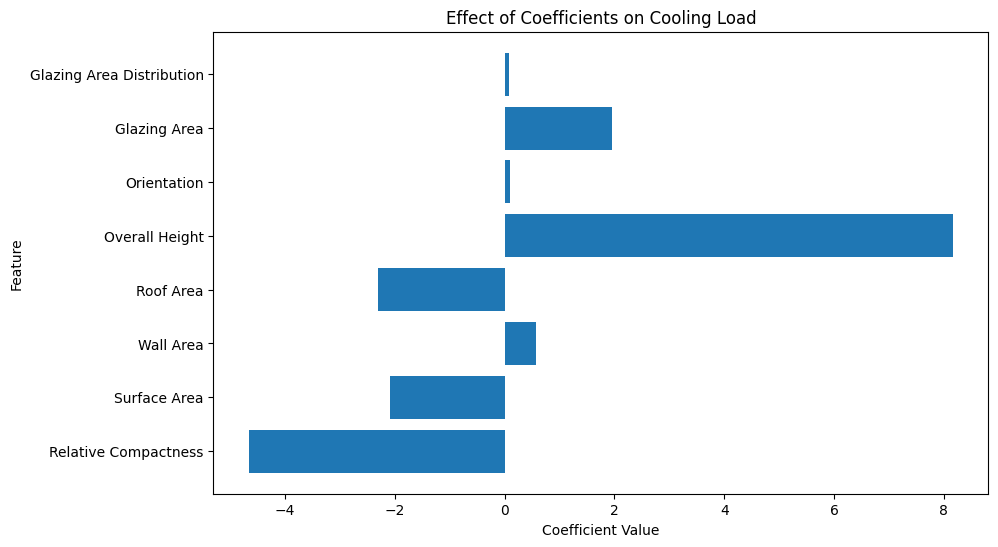

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), coef[1], align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Cooling Load')
plt.show()

In [10]:
# Showing the top coefficients for each response variable
absolute_coefficients = np.abs(coef)
top_indices = [np.argsort(item)[::-1] for item in absolute_coefficients]

print("Top 5 features for Heating Load")
top_y1_x_columns = [X.columns[item] for item in top_indices[0][:5]]
print(top_y1_x_columns)

print("Top 5 features for Cooling Load")
top_y2_x_columns = [X.columns[item] for item in top_indices[1][:5]]
print(top_y2_x_columns)

Top 5 features for Heating Load
['Overall Height', 'Relative Compactness', 'Glazing Area', 'Roof Area', 'Surface Area']
Top 5 features for Cooling Load
['Overall Height', 'Relative Compactness', 'Roof Area', 'Surface Area', 'Glazing Area']


In [11]:
# Redoing the model on just the top 5 features.
coefs_y1 = []
mses_val_y1 = []
scores_val_y1 = []
clfs_y1 = []

coefs_y2 = []
mses_val_y2 = []
scores_val_y2 = []
clfs_y2 = []


for a in alphas: # using the same set of alphas as before
    # Training on y1, Heating Load
    ridge_clf = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=a))])
    ridge_clf = ridge_clf.fit(X_train[top_y1_x_columns].values, y_train['Heating Load'].values)
    coefs_y1.append(ridge_clf.named_steps['ridge'].coef_)

    pred = ridge_clf.predict(X_val[top_y1_x_columns].values)
    mses_val_y1.append(mean_squared_error(y_val['Heating Load'].values, pred))
    scores_val_y1.append(ridge_clf.score(X_val[top_y1_x_columns].values, y_val['Heating Load'].values))
    clfs_y1.append(ridge_clf)
    
    # Training on y2, Cooling Load
    ridge_clf = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=a))])
    ridge_clf = ridge_clf.fit(X_train[top_y2_x_columns].values, y_train['Cooling Load'].values)
    coefs_y2.append(ridge_clf.named_steps['ridge'].coef_)

    pred = ridge_clf.predict(X_val[top_y2_x_columns].values)
    mses_val_y2.append(mean_squared_error(y_val['Cooling Load'].values, pred))
    scores_val_y2.append(ridge_clf.score(X_val[top_y2_x_columns].values, y_val['Cooling Load'].values))
    clfs_y2.append(ridge_clf)

In [12]:
# Best performing classifier on test set for Y1 with top 5 features
values_test_y1 = list(zip(coefs_y1, mses_val_y1, scores_val_y1, clfs_y1))
values_test_y1.sort(reverse=True, key=lambda x: x[2])
clf_y1 = values_test_y1[0][3]

pred_y1 = clf_y1.predict(X_test[top_y1_x_columns].values)
mse_y1 = mean_squared_error(y_test['Heating Load'].values, pred)
score_y1 = clf_y1.score(X_test[top_y1_x_columns].values, y_test['Heating Load'].values)
coef_y1 = clf_y1.named_steps['ridge'].coef_

print("These are the coefficients for the reduced feature set (top 5 features) on the first response variable, Heating Load")
# Showing the top coefficients for each response variable
absolute_coefficients = np.abs(coef_y1)
top_indices = np.argsort(absolute_coefficients)[::-1]

new_top_y1_x_columns = [X[top_y1_x_columns].columns[item] for item in top_indices]
print(new_top_y1_x_columns)

These are the coefficients for the reduced feature set (top 5 features) on the first response variable, Heating Load
['Overall Height', 'Roof Area', 'Relative Compactness', 'Glazing Area', 'Surface Area']


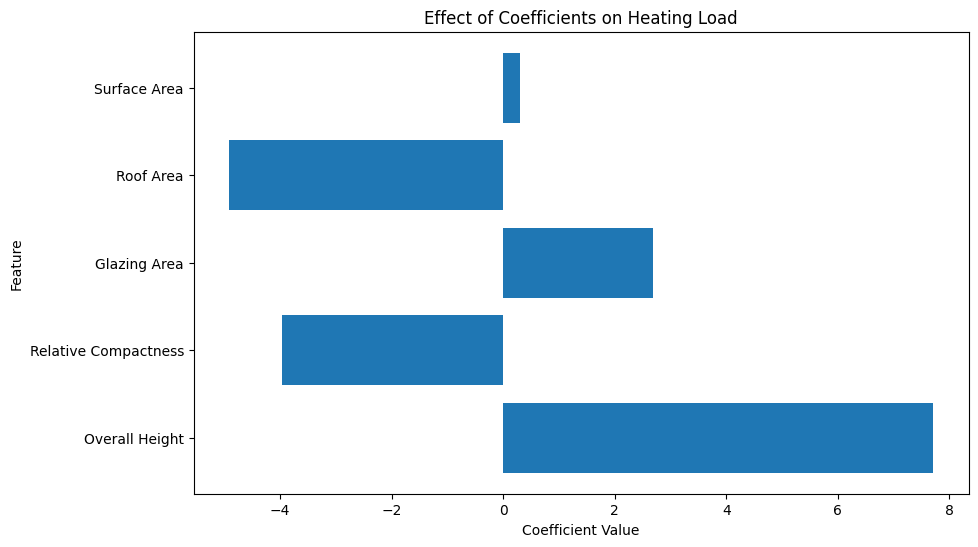

In [13]:
absolute_coefficients_y1 = np.abs(coef_y1)
feature_names_y1 = list(X[top_y1_x_columns].columns)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names_y1)), coef_y1, align='center')
plt.yticks(np.arange(len(feature_names_y1)), feature_names_y1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Heating Load')
plt.show()

In [14]:
# Best performing classifier on test set for Y1 with top 5 features
values_test_y2 = list(zip(coefs_y2, mses_val_y2, scores_val_y2, clfs_y2))
values_test_y2.sort(reverse=True, key=lambda x: x[2])
clf_y2 = values_test_y2[0][3]

pred_y2 = clf_y2.predict(X_test[top_y2_x_columns].values)
mse_y2 = mean_squared_error(y_test['Cooling Load'].values, pred)
score_y2 = clf_y2.score(X_test[top_y2_x_columns].values, y_test['Cooling Load'].values)
coef_y2 = clf_y2.named_steps['ridge'].coef_

# Showing the top coefficients for each response variable
print("These are the coefficients for the reduced feature set (top 5 features) on the second response variable, Cooling Load")
absolute_coefficients = np.abs(coef_y2)
top_indices = np.argsort(absolute_coefficients)[::-1]

new_top_y2_x_columns = [X[top_y2_x_columns].columns[item] for item in top_indices]
print(new_top_y2_x_columns)

These are the coefficients for the reduced feature set (top 5 features) on the second response variable, Cooling Load
['Overall Height', 'Relative Compactness', 'Roof Area', 'Glazing Area', 'Surface Area']


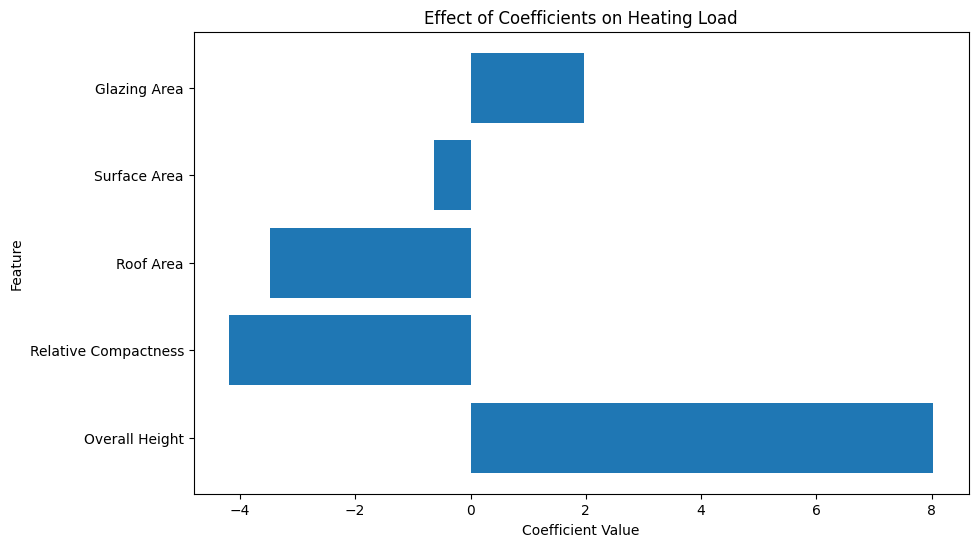

In [15]:
absolute_coefficients_y2 = np.abs(coef_y2)
feature_names_y2 = list(X[top_y2_x_columns].columns)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names_y2)), coef_y2, align='center')
plt.yticks(np.arange(len(feature_names_y2)), feature_names_y2)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Heating Load')
plt.show()

In [16]:
import csv
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc



In [17]:
# Loading the datasource
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_diagnostic.data.features 
encoded_y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [18]:
def performance_metrics(conf_matrix):
    epsilon = 1e-9  
    
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / (conf_matrix.sum())
    precision = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0] + epsilon)
    recall = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + epsilon)
    f1_score = 2 * (precision * recall) / (precision + recall + epsilon)
    false_alarm_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1] + epsilon)
    missed_detection_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1] + epsilon)
    false_positive_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    true_positive_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    return accuracy, precision, recall, f1_score, false_alarm_rate, missed_detection_rate, false_positive_rate, true_positive_rate


In [19]:
print("Labels (y):")
y = [1 if item == 'M' else 0 for item in encoded_y['Diagnosis']]
print(y)
print("Features (X):", x.values)
headers = [
    "ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", 
    "smoothness1", "compactness1", "concavity1", "concave_points1", 
    "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2", 
    "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", 
    "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3",
    "area3", "smoothness3", "compactness3", "concavity3", "concave_points3",
    "symmetry3", "fractal_dimension3"
]
# data = x.values
data = np.array([[idx, y[idx], *item] for idx, item in enumerate(x.values)])
print(data.shape)

Labels (y):
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 

In [20]:
df = pd.DataFrame(data, columns=headers)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set width of display
pd.set_option('display.max_rows', 10)  # Limit the number of rows displayed
columns_to_display = ["Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", 
    "symmetry1", "fractal_dimension1"]
rows_to_display = 8

print(df[columns_to_display].head(rows_to_display))

   Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  compactness1  concavity1  concave_points1  symmetry1  fractal_dimension1
0        1.0    17.99     10.38      122.80  1001.0      0.11840       0.27760     0.30010          0.14710     0.2419             0.07871
1        1.0    20.57     17.77      132.90  1326.0      0.08474       0.07864     0.08690          0.07017     0.1812             0.05667
2        1.0    19.69     21.25      130.00  1203.0      0.10960       0.15990     0.19740          0.12790     0.2069             0.05999
3        1.0    11.42     20.38       77.58   386.1      0.14250       0.28390     0.24140          0.10520     0.2597             0.09744
4        1.0    20.29     14.34      135.10  1297.0      0.10030       0.13280     0.19800          0.10430     0.1809             0.05883
5        1.0    12.45     15.70       82.57   477.1      0.12780       0.17000     0.15780          0.08089     0.2087             0.07613
6        1.0    18.25     1

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

# Create pipeline with standard scaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # StandardScaler for standardizing features
    ('classifier', LogisticRegression())  # Logistic Regression classifier
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

Equation of Logistic Regression with Coefficients: 
b + 0.289381565368004*x_1 - 0.106735743953196*x_10 + 1.2049608934992*x_11 - 0.397278256779608*x_12 + 0.77755842980633*x_13 + 0.91367191346183*x_14 + 0.219553470789328*x_15 - 0.901709331575537*x_16 - 0.0853762913007951*x_17 + 0.409768298796075*x_18 - 0.327717952336098*x_19 + 0.495005043728576*x_2 - 0.50720575449696*x_20 + 0.843263129474551*x_21 + 1.38238038797409*x_22 + 0.712050720098665*x_23 + 0.882353203576023*x_24 + 0.469946594526669*x_25 - 0.188113267700321*x_26 + 0.833666384840259*x_27 + 0.678712582757793*x_28 + 1.08364270103917*x_29 + 0.293131900442656*x_3 + 0.0116643521586304*x_30 + 0.410226880633592*x_4 + 0.387174789822483*x_5 - 0.457695424512749*x_6 + 0.807618556478657*x_7 + 0.848999216768447*x_8 - 0.238608986298149*x_9


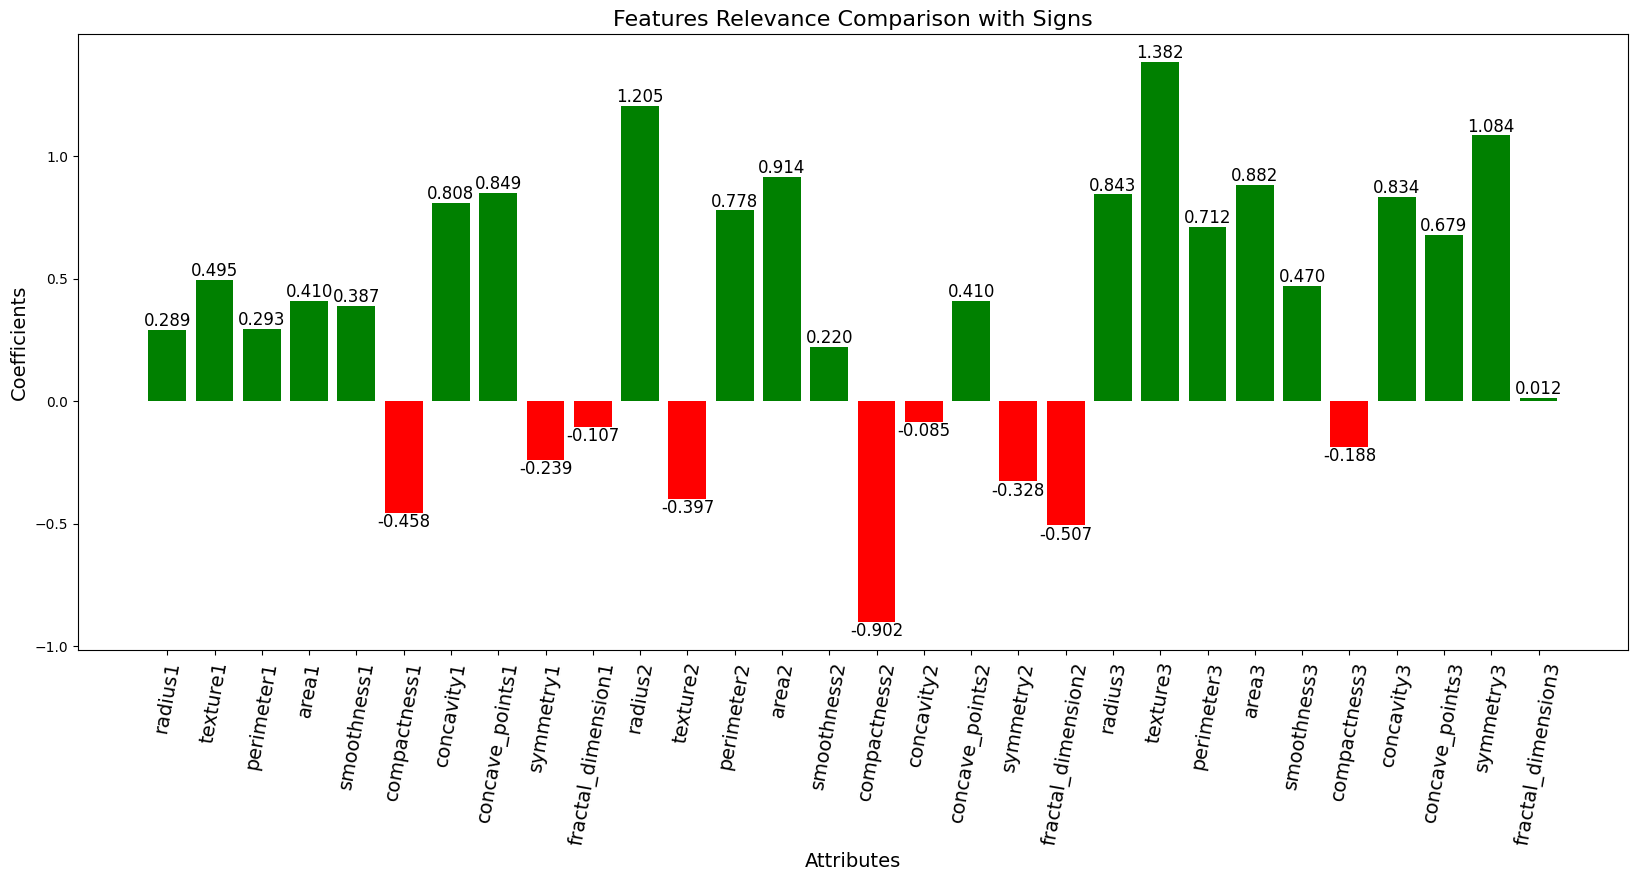

In [22]:
# Getting the coefficients of the Logistic Regression Model
coefficients = pipeline.named_steps['classifier'].coef_
coefficients_reversed = coefficients[0][::-1]
x_reversed = [sp.symbols(f'x_{len(coefficients_reversed) - i}') for i in range(len(coefficients_reversed))]

# Defining symbols 
b, y = sp.symbols('b y')
coef = [sp.symbols(f'coef_{i}') for i in range(len(coefficients_reversed))]

# Creating the equation
equation = sum([coef[i] * x_reversed[i] for i in range(len(coefficients_reversed))]) + b
equation_with_coefficients = equation.subs({coef[i]: coefficients_reversed[i] for i in range(len(coefficients_reversed))})

print("Equation of Logistic Regression with Coefficients: ")
print(equation_with_coefficients)


# Plotting bar chart 
coefficients_val = coefficients.flatten()
colors = ['green' if val >= 0 else 'red' for val in coefficients_val]


plt.figure(figsize=(20, 8))  # Set the size of the plot
bars = plt.bar(headers[2:], coefficients_val, color=colors)
plt.xticks(rotation=80, fontsize = 14)
plt.xlabel('Attributes', fontsize = 14)
plt.ylabel('Coefficients', fontsize = 14)
plt.title('Features Relevance Comparison with Signs', fontsize = 16)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.3f}', ha='center', va= 'bottom' if height >= 0 else 'top' , fontsize=12)
plt.show()

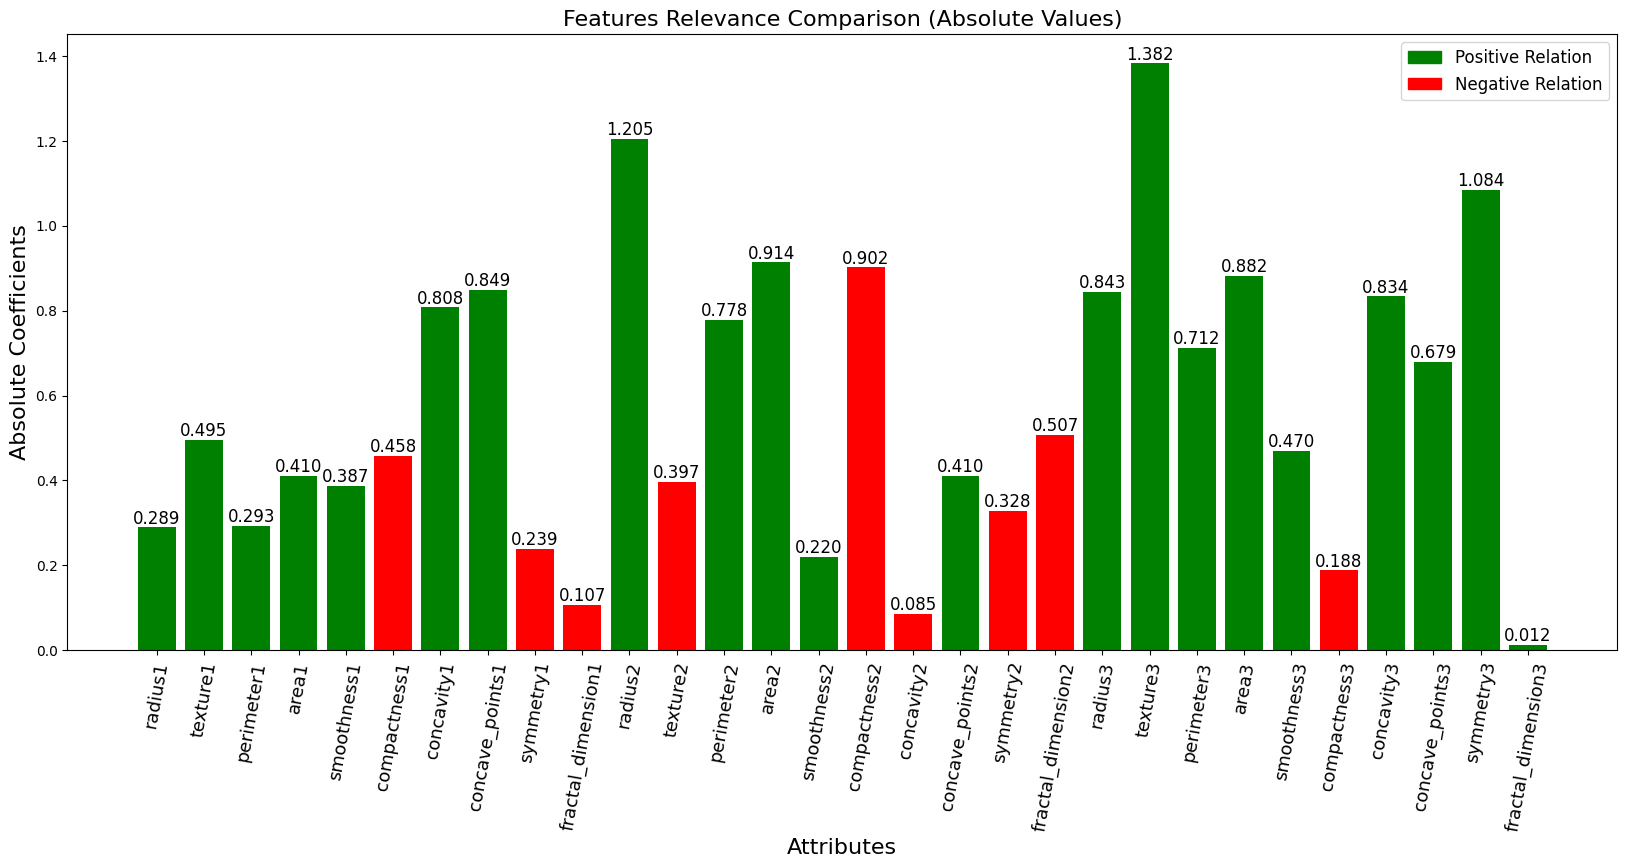

             Attribute  Coefficient
0              radius1     0.289382
1             texture1     0.495005
2           perimeter1     0.293132
3                area1     0.410227
4          smoothness1     0.387175
..                 ...          ...
25        compactness3     0.188113
26          concavity3     0.833666
27     concave_points3     0.678713
28           symmetry3     1.083643
29  fractal_dimension3     0.011664

[30 rows x 2 columns]


In [23]:
coefficients_val = coefficients.flatten()

# Taking absolute values of coefficients
coefficients_abs = np.abs(coefficients_val)
colors = ['green' if val >= 0 else 'red' for val in coefficients_val]
plt.figure(figsize=(20, 8))  # Set the size of the plot
bars = plt.bar(headers[2:], coefficients_abs, color=colors)
plt.xticks(rotation=80, fontsize=13)
plt.xlabel('Attributes', fontsize=16)
plt.ylabel('Absolute Coefficients', fontsize=16)
plt.title('Features Relevance Comparison (Absolute Values)', fontsize=16)

# Creating legend labels based on colors
legend_labels = ['Positive Relation', 'Negative Relation']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in set(colors)]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=12)
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom', fontsize=12)
    
    
plt.show()


# Show table of attributes
df_coefficients = pd.DataFrame({'Attribute': headers[2:], 'Coefficient': coefficients_abs})
print(df_coefficients)

Confusion Matrix on Training Set:
[[250   0]
 [  5 143]]
Accuracy:  0.9874371859296482
Precision:  0.9803921568589005
Recall:  0.9999999999960001
f1 Score:  0.9900990093971179
False Alarm Rate:  0.03378378378355552
Missed Detection Rate:  0.0
False Positive Rate:  0.033783783783783786
True Positive Rate:  1.0


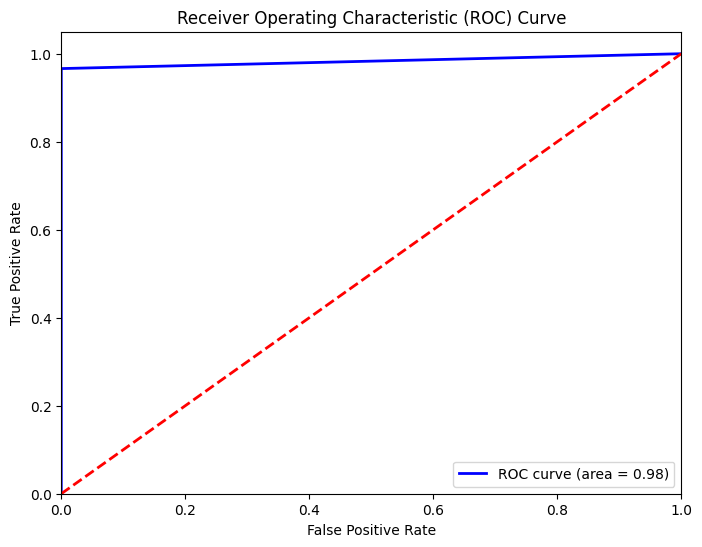

In [24]:
y_pred = pipeline.predict(X_train)

# Confusion matrix for training
conf_matrix = confusion_matrix(y_train, y_pred)

print("Confusion Matrix on Training Set:")
print(conf_matrix)

acc, prec, rec, f1, fam, mdr, fpr, tpr = performance_metrics(conf_matrix)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("f1 Score: ", f1)
print("False Alarm Rate: ", fam)
print("Missed Detection Rate: ", mdr)
print("False Positive Rate: ", fpr)
print("True Positive Rate: ", tpr)

fpr, tpr, thresholds = roc_curve(y_train, y_pred)
# Calculating AUC for training
roc_auc = auc(fpr, tpr)

# Plotting ROC curve for training
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix on Test Set:
[[106   1]
 [  4  60]]
Accuracy:  0.9707602339181286
Precision:  0.9636363636276033
Recall:  0.9906542055982182
f1 Score:  0.9769585248367134
False Alarm Rate:  0.062499999999023434
Missed Detection Rate:  0.00934579439243602
False Positive Rate:  0.0625
True Positive Rate:  0.9906542056074766


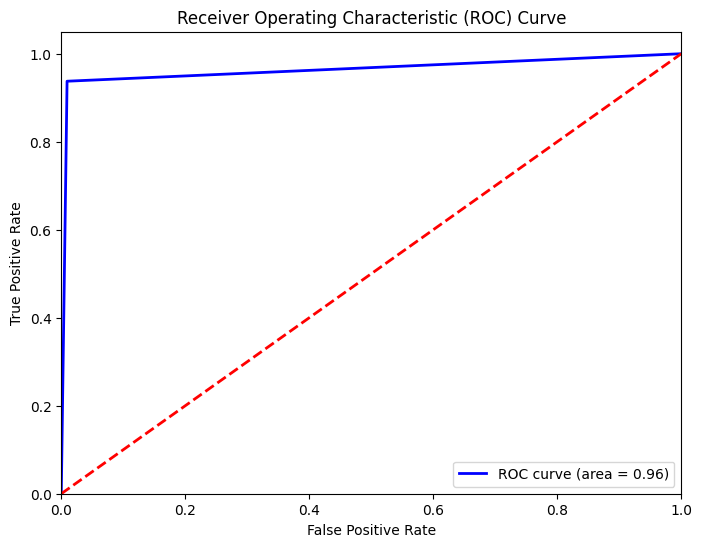

In [25]:
y_pred = pipeline.predict(X_test)

# Confusion matrix for testing
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix on Test Set:")
print(conf_matrix)

acc, prec, rec, f1, fam, mdr, fpr, tpr = performance_metrics(conf_matrix)
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("f1 Score: ", f1)
print("False Alarm Rate: ", fam)
print("Missed Detection Rate: ", mdr)
print("False Positive Rate: ", fpr)
print("True Positive Rate: ", tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculating AUC for testing
roc_auc = auc(fpr, tpr)

# Plotting ROC curve for testing
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()